# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [22]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # 另一個繪圖-樣式套件

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [9]:
app_train['YEARS_BIRTH']=app_train['DAYS_BIRTH']/365
app_train['BIRTH_GROUP']= pd.cut(app_train["YEARS_BIRTH"], 10)
app_train["BIRTH_GROUP"].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: BIRTH_GROUP, dtype: int64

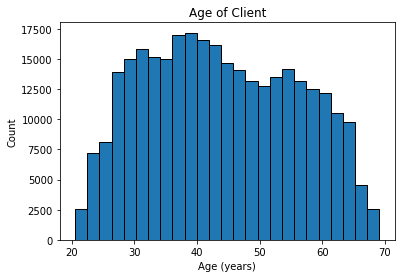

In [10]:
#先練習年齡長條圖
plt.hist(app_train['YEARS_BIRTH'] , edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

In [16]:
#group by
age_groups=app_train.groupby('BIRTH_GROUP').sum()
age_groups.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH
BIRTH_GROUP,,,,,,,,,,,,,,,,,,,,,
"(20.469, 25.378]",3790703345,1669,3091,2.008253e+09,5.751652e+09,3.003789e+08,5.185431e+09,279.123338,117723337,-10912423.0,...,7,67,91.0,72.0,339.0,1562.0,2687.0,15661.0,37.0,3.225297e+05
"(25.378, 30.238]",9205071385,3690,18119,5.480158e+09,1.689643e+10,8.601260e+08,1.519160e+10,665.753619,339371789,-43801324.0,...,30,23,201.0,212.0,934.0,6390.0,7098.0,49479.0,111.0,9.297857e+05
"(30.238, 35.099]",10681647806,3916,31584,6.856009e+09,2.205003e+10,1.054810e+09,1.979613e+10,783.506248,457846024,-68801952.0,...,24,3,207.0,260.0,1157.0,9608.0,8451.0,59663.0,152.0,1.254373e+06
"(35.099, 39.959]",11618378435,3736,35361,7.501334e+09,2.622709e+10,1.180917e+09,2.356253e+10,865.878697,572827061,-92390212.0,...,23,5,227.0,261.0,1247.0,10323.0,9767.0,67438.0,334.0,1.569389e+06
"(39.959, 44.819]",11251509951,3187,23850,7.321982e+09,2.618674e+10,1.160419e+09,2.351372e+10,844.023311,623781605,-103497386.0,...,32,3,218.0,218.0,1230.0,10633.0,9379.0,67565.0,607.0,1.708991e+06


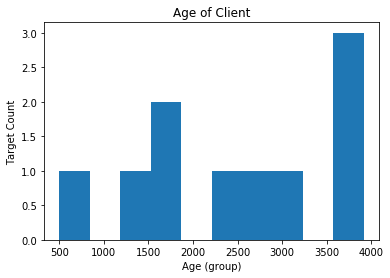

In [19]:
#plt圖做不出想要的樣子
plt.hist(age_groups['TARGET'])
plt.title('Age of Client'); plt.xlabel('Age (group)'); plt.ylabel('Target Count');
plt.show()

C:\Users\June Chou\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


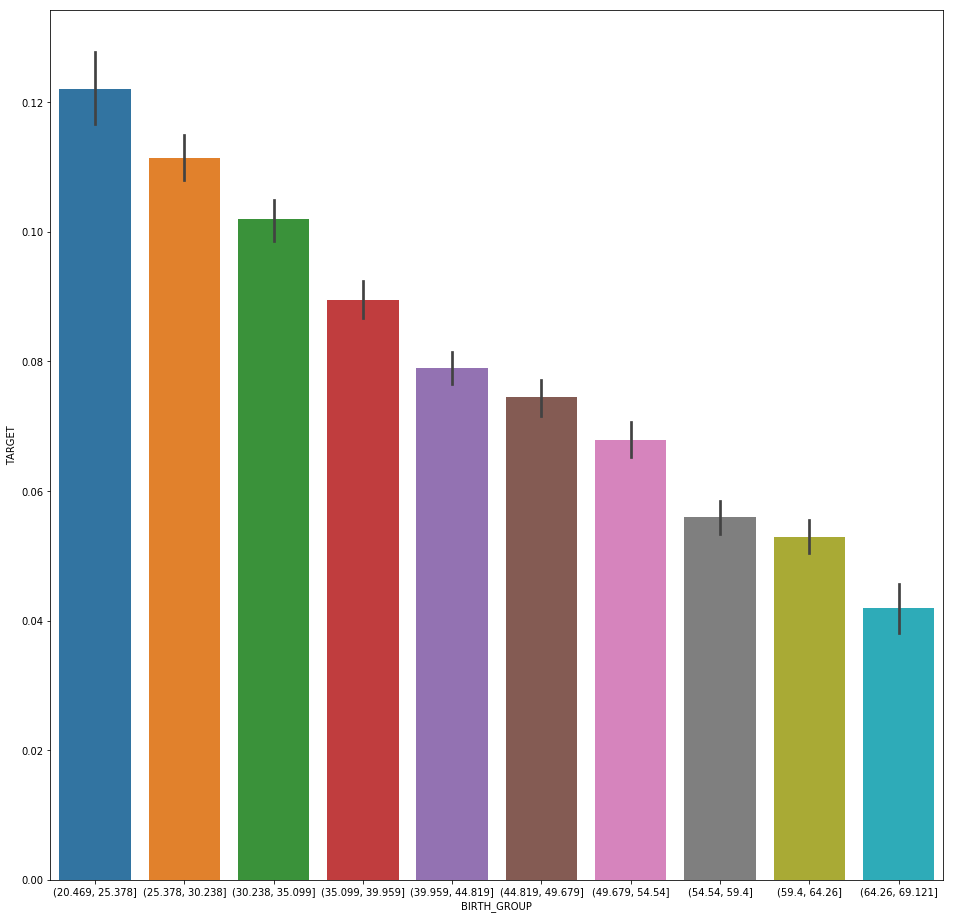

In [36]:
#seaborn依照比例顯示
plt.figure(figsize = (16, 16))
px = app_train['BIRTH_GROUP']
py = app_train['TARGET']   #*app_train["TARGET"].sum() #前面做過比例處理
sns.barplot(px, py)

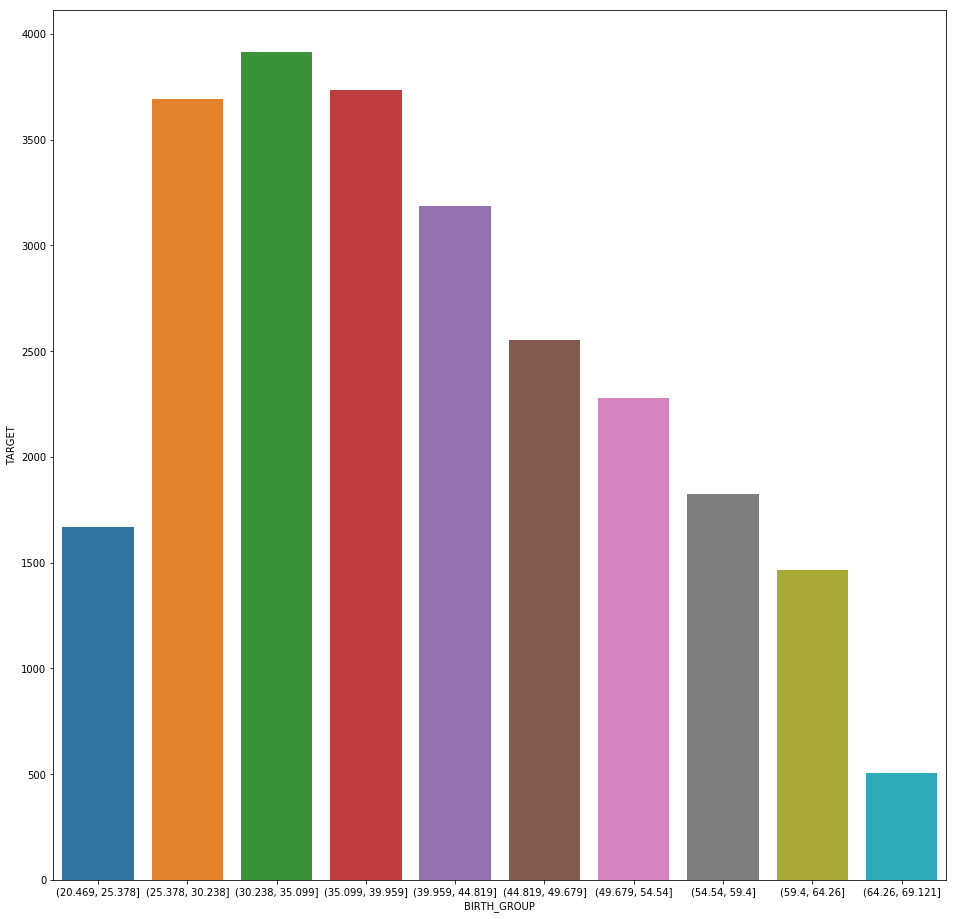

In [30]:
#下面是先group by 後再群組加總
plt.figure(figsize = (16, 16))
px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)